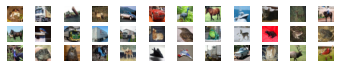

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 6, 6, 64)         

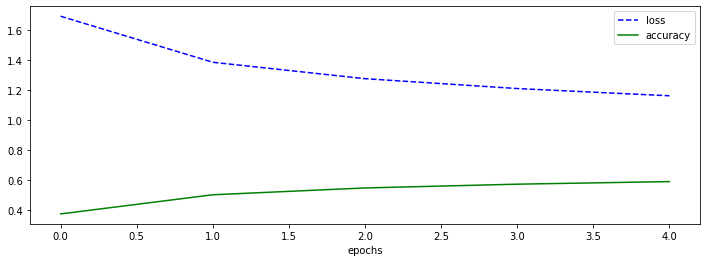

최적화 완료!
test results==============================
313/313 - 3s - loss: 1.0770 - accuracy: 0.6222 - 3s/epoch - 11ms/step

 Accuracy:0.6222


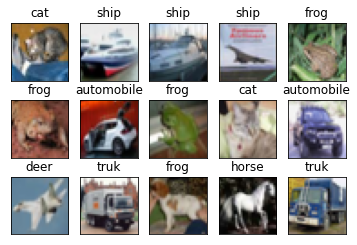

============================================================@@


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pylab as plt
from keras.layers import BatchNormalization, Dropout

(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truk']
#이미지 불러온 후 리스트 구현하여 각 대응점 구축


plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3,12,i+1)
  plt.imshow(train_images[i],cmap='brg')
  plt.axis('off')

plt.show()
#이미지 불러오기

train_images=train_images.reshape((50000,32,32,3))
test_images=test_images.reshape((10000,32,32,3))
train_images,test_images=train_images/255.0,test_images/255.0
# 훈련 데이터 50000개의 32*32 3채널 이미지로 변환 테스트데이터도 역시 10000개로 reshape 그리고 픽셀최대값 255로나눠서 정규화




#model.add(BatchNormalization())


# 모델 작성
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='valid',
                                 strides=(1,1), input_shape=(32,32,3)))
#처음 컨볼루션시 넣어지는 값의 shape값으로 인풋인자를 항상 부여한다. 패딩은 안하고 스트라이드는 1,1

#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))
#배치정규화를 하거나 맥스풀링을 하거나 드랍아웃을 할 지는 주석처리를 통해 쉽게 결정한다.활성화함수는 'relu'로 고정 

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Flatten())
#벡터화

model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 컴파일 실행 
model.summary()
#요약
history=model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)
#학습시작

plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()
print('최적화 완료!')
#맷플롭립 활용 오차 정확도 시각화

print('test results==============================')

labels=model.predict(test_images)
# 정확도 출력용 코드
print('\n Accuracy:%.4f'%(model.evaluate(test_images,test_labels,verbose=2)[1]))

fig=plt.figure()

for i in range(15):
  subplot=fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s'%class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32,32,3)),cmap=plt.cm.brg)
#이미지 15개나열용 코드
plt.show()

print('============================================================@@')


,item A,item B,item C
obs,24,378,251
exp,271,189,202


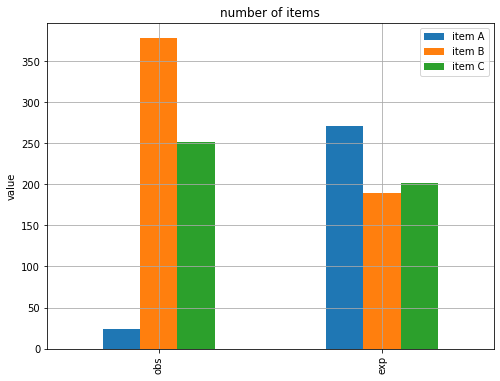

Power_divergenceResult(statistic=426.0115998684739, pvalue=3.1099719728627643e-93)

In [17]:
#단일 표본 티검정
#귀무가설-170이다.



import numpy as np
from scipy import stats
from pandas import DataFrame
from scipy.stats import chisquare

#height_list=np.array([169,167,175,166,162,180,172,162,173,162,181,175,181,181,162,165,172,176,167,165])

#height_list

#tTestResult=stats.ttest_1samp(height_list,170)
#tTestResult

#print('t statics=%.3f, p-value = %.3f'%(tTestResult))

#group1Heights=np.array([162,168,169,165,166,168,162,172,157,173,158,169,164,170,163,175,177,162,175,177])

#group2Heights=np.array([180,181,163,164,174,169,164,172,162,171,180,168,164,169,169,178,177,167,179,172])

#tTestResult=stats.ttest_ind(group1Heights,group2Heights)


#tTestResult


#before=np.array([80,82,76,82,65,73,77,78,61,61,80,70,60,83,89,84,85,81,67,60])

#tmp_list=[]

#for i in before:
 # tmp_list.append(i*np.random.normal(0.99,0.02))

#after=np.array(tmp_list)

#print(after)



#tTestResult=stats.ttest_rel(before,after)


#tTestResult


xo,xe=[24,378,251],[271,189,202]
xc=DataFrame([xo,xe],columns=['item A','item B','item C'],index=['obs','exp'])

display(xc)
import matplotlib.pyplot as plt

ax=xc.plot(kind='bar',title='number of items',figsize=(8,6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()



result=chisquare(xo,f_exp=xe)
result

